# Аналитический этап

## Интегрирование функции $$ 2^x - x{\ln2} $$ на интервале \\( [-1, 2] \\)


### 1. Верхняя и нижняя суммы Дарбу

Для нахождения верхней и нижней сумм Дарбу необходимо разбить интервал \\( [-1, 2] \\) на \\( n \\) частей, с выбором разбиения \\( P = \{x_0, x_1, \dots, x_n\} \\), где \\( x_0 = -1 \\) и \\( x_n = 2 \\).

#### 1.1. Нижняя сумма Дарбу
Нижняя сумма Дарбу на разбиении \\( P \\) определяется как:
$$
L(f, P) = \sum_{i=1}^{n} m_i (x_i - x_{i-1}) ,
$$
где \\(m_i = \min_{x \in [x_{i-1}, x_i]} f(x) \\).

#### 1.2. Верхняя сумма Дарбу
Верхняя сумма Дарбу на разбиении \\( P \\) определяется как:
$$
U(f, P) = \sum_{i=1}^{n} M_i (x_i - x_{i-1}),
$$
где \\( M_i = \max_{x \in [x_{i-1}, x_i]} f(x) \\).

#### 1.3. Критерий Римана
Функция \\( f(x) \\) интегрируема в Римане на интервале \\( [-1, 2] \\), если для любого \\( \epsilon > 0 \\) существует разбиение \\( P \\), такое что разница между верхней и нижней суммой Дарбу меньше \\( \epsilon \\):
$$
U(f, P) - L(f, P) < \epsilon.
$$

### 2. Интегралы Дарбу

Интегралы Дарбу — это пределы нижней и верхней сумм при \\( n \to \infty \\), если они сходятся:
$$
\int_{-1}^{2} f(x) \, dx = \lim_{n \to \infty} L(f, P_n) = \lim_{n \to \infty} U(f, P_n).
$$

### 3. Достаточное условие интегрируемости

Для того чтобы функция \\( f(x) = 2^x - x{\ln2} \\) была интегрируема в Римане, достаточным условием является её ограниченность и непрерывность на интервале \\( [-1, 2] \\). Функция \\( f(x) \\) непрерывна на данном интервале и, следовательно, интегрируема.

### 4. Сравнение с формулой Ньютона-Лейбница

Первообразная функции \\( f(x) = 2^x - x{\ln2} \\):

- Первообразная от \\(2^x\\) — это \\( \frac{2^x}{\ln2}\\).
- Первообразная от \\( -x{\ln2} \\) — это \\(-{\ln2}*\frac{x^2}{2} \\).

Таким образом, первообразная \\( F(x) \\) будет:
$$
F(x) = \frac{2^x}{\ln2} - \frac{x^2}{2} \ln2.
$$

Теперь, применяя формулу Ньютона-Лейбница, находим интеграл:
$$
\int_{-1}^{2} f(x) \, dx = F(2) - F(-1).
$$

#### 4.1. Вычисление значений первообразной
$$
F(2) = \frac{2^2}{\ln2} \ - \frac{2^2}{2} \ln2 = \frac{4}{\ln 2} - 2\ln2,
$$
$$
F(-1) = \frac{2^{-1}}{\ln2} - \frac{(-1)^{2}}{2} \ln2 = \frac{1}{2 \ln 2} - \frac{1}{2} \ln2.
$$

#### 4.2. Разница между значениями
$$
F(2) - F(-1) = \left(\frac{4}{\ln 2} \ - 2{\ln2} \right) - \left(\frac{1}{2\ln2} \ - \frac{1}{2} {\ln2} \right)
= \frac{7}{2\ln2} - \frac{3}{2} \ln2 = \frac{7-3(\ln2)^2}{2\ln2}
$$

Таким образом, интеграл равен
:
$$
\int_{-1}^{2} f(x) \, dx = \frac{7-3(\ln2)^2}{2\ln2}.
$$


# Практический этап

Подключим нужные библиотечки

In [49]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Напишем функцию, которая задана нам по условию

In [50]:
def f(x):
    return 2**x - x * math.log(2)

### Аналитическое решение


Получили, что аналитическое решение равняется
$$
\int_{-1}^{2} f(x) \, dx = \frac{7-3(\ln2)^2}{2\ln2}.
$$

Интегрируем по Формуле Ньютона-Лейбинца, то есть разбиваем по частям.

In [51]:
def integral_analytical(a, b):
    return (7 - 3 * (math.log(2))**2) / (2 * math.log(2))

In [52]:
a, b = -1, 2
result = integral_analytical(a, b)
print(f"Аналитический результат: {result:.4f}")

Аналитический результат: 4.0097


Проверим результат

In [53]:
print((7 - 3*(math.log(2)**2))/(2*math.log(2)) - integral_analytical(a, b))

0.0


## 1. Напишем функцию разбиения

In [54]:
def uniform_partition(a, b, n):
    dx = (b - a) / n
    return [a + i * dx for i in range(n + 1)]

## 2. Cоставим интегральную сумму

### 2.1 Метод прямоугольника

In [55]:
def rectangle_method(f, a, b, n, mode="mid"):
    points = uniform_partition(a, b, n)
    total = 0.0

    for i in range(n):
        x_left = points[i]
        x_right = points[i + 1]
        dx = x_right - x_left

        if mode == "left":
            xi = x_left
        elif mode == "right":
            xi = x_right
        elif mode == "mid":
            xi = (x_left + x_right) / 2
        elif mode == "random":
            xi = random.uniform(x_left, x_right)
        else:
            raise ValueError(f"Такого разбиения нет: {mode}")

        total += f(xi) * dx

    return total

In [56]:
result_rec_left = rectangle_method(f, -1, 2, 100, mode="left")
print(f"Результат: {result_rec_left:.4f}")

Результат: 3.9886


In [57]:
result_rec_right = rectangle_method(f, -1, 2, 100, mode="right")
print(f"Результат: {result_rec_right:.4f}")

Результат: 4.0312


In [58]:
result_rec_mid = rectangle_method(f, -1, 2, 100, mode="mid")
print(f"Результат: {result_rec_mid:.4f}")

Результат: 4.0096


In [59]:
result_rec_rand = rectangle_method(f, -1, 2, 100, mode="random")
print(f"Результат: {result_rec_rand:.4f}")

Результат: 4.0091


### 2.2 Метод трапеции

In [60]:
def trapezoid_method(f, a, b, n):
    points = uniform_partition(a, b, n)
    total = 0.0

    for i in range(n):
        x_left = points[i]
        x_right = points[i + 1]
        dx = x_right - x_left

        total += (f(x_left) + f(x_right)) * dx / 2

    return total

In [61]:
result_trapez = trapezoid_method(f, -1, 2, 100)
print(f"Результат: {result_trapez:.4f}")

Результат: 4.0099


### 2.2 Метод Симпсона

In [62]:
def simpson_method(f, a, b, n):
    n = n if n % 2 == 0 else n + 1

    points = uniform_partition(a, b, n)
    dx = points[1] - points[0]

    total = f(a) + f(b)

    for i in range(1, n):
        x = points[i]
        weight = 4 if i % 2 != 0 else 2
        total += weight * f(x)

    return total * dx / 3

In [63]:
result_simp = simpson_method(f, -1, 2, 100)
print(f"Результат: {result_simp:.4f}")

Результат: 4.0097


# 3. Нарисуем графики площадей

In [64]:
def plot_methods_combined(f, a, b, n_values):
    plt.style.use('ggplot')
    colors = {
        'rectangle': '#FF9F1C',
        'trapezoid': '#2EC4B6',
        'simpson': '#E71D36'
    }
    methods = ['rectangle', 'trapezoid', 'simpson']
    labels = ['Метод прямоугольников', 'Метод трапеций', 'Метод Симпсона']

    for n in n_values:

        points = uniform_partition(a, b, n)
        x_vals = np.linspace(a, b, 400)
        y_vals = [f(x) for x in x_vals]

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'Сравнение методов (n={n})', fontsize=16, fontweight='bold', y=1.02)

        for ax, method, label in zip(axes, methods, labels):
            ax.plot(x_vals, y_vals, color='#2B2D42', lw=2, label=r'$f(x) = 2**x - x * math.log(2)$')

            current_points = points if method != 'simpson' else uniform_partition(a, b, n)
            current_n = n if method != 'simpson' else n

            for i in range(current_n):
                x_left = current_points[i]
                x_right = current_points[i + 1]

                if method == 'rectangle':
                    xi = (x_left + x_right) / 2
                    height = f(xi)
                    ax.fill_between([x_left, x_right], [height, height],
                                    color=colors[method], alpha=0.3, edgecolor='#2B2D42', linewidth=0.7)

                elif method == 'trapezoid':
                    y_left = f(x_left)
                    y_right = f(x_right)
                    ax.fill_between([x_left, x_right], [y_left, y_right],
                                    color=colors[method], alpha=0.3, edgecolor='#2B2D42', linewidth=0.7)

                elif method == 'simpson':
                    x_mid = (x_left + x_right) / 2
                    x_parabola = np.linspace(x_left, x_right, 50)
                    y_parabola = f(x_left) * ((x_parabola - x_mid) * (x_parabola - x_right)) / (
                            (x_left - x_mid) * (x_left - x_right)) + \
                                 f(x_mid) * ((x_parabola - x_left) * (x_parabola - x_right)) / (
                                         (x_mid - x_left) * (x_mid - x_right)) + \
                                 f(x_right) * ((x_parabola - x_left) * (x_parabola - x_mid)) / (
                                         (x_right - x_left) * (x_right - x_mid))
                    ax.fill_between(x_parabola, y_parabola, color=colors[method], alpha=0.3, edgecolor='#2B2D42',
                                    linewidth=0.7)

            ax.set_title(label, fontsize=12, pad=10)
            ax.set_xlabel('x', fontsize=10)
            ax.set_ylabel('f(x)', fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.4)
            ax.set_axisbelow(True)
            for spine in ax.spines.values():
                spine.set_visible(False)

        plt.tight_layout()
        plt.show()

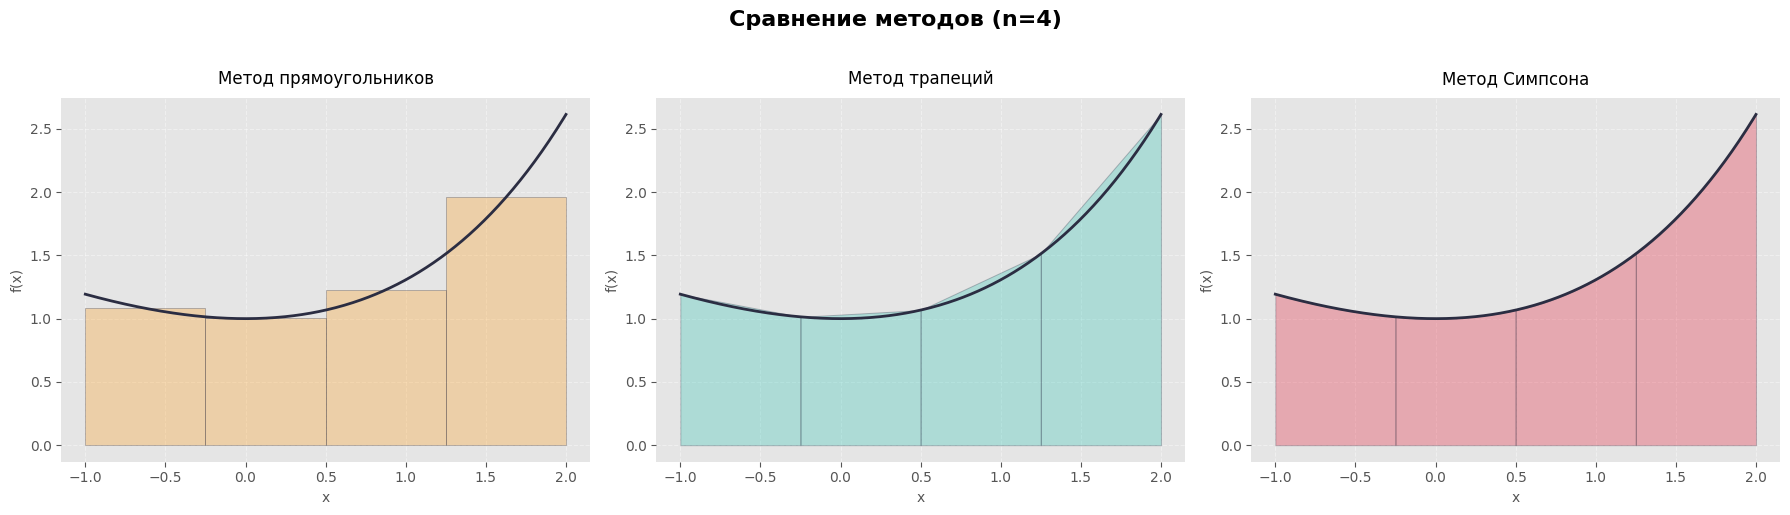

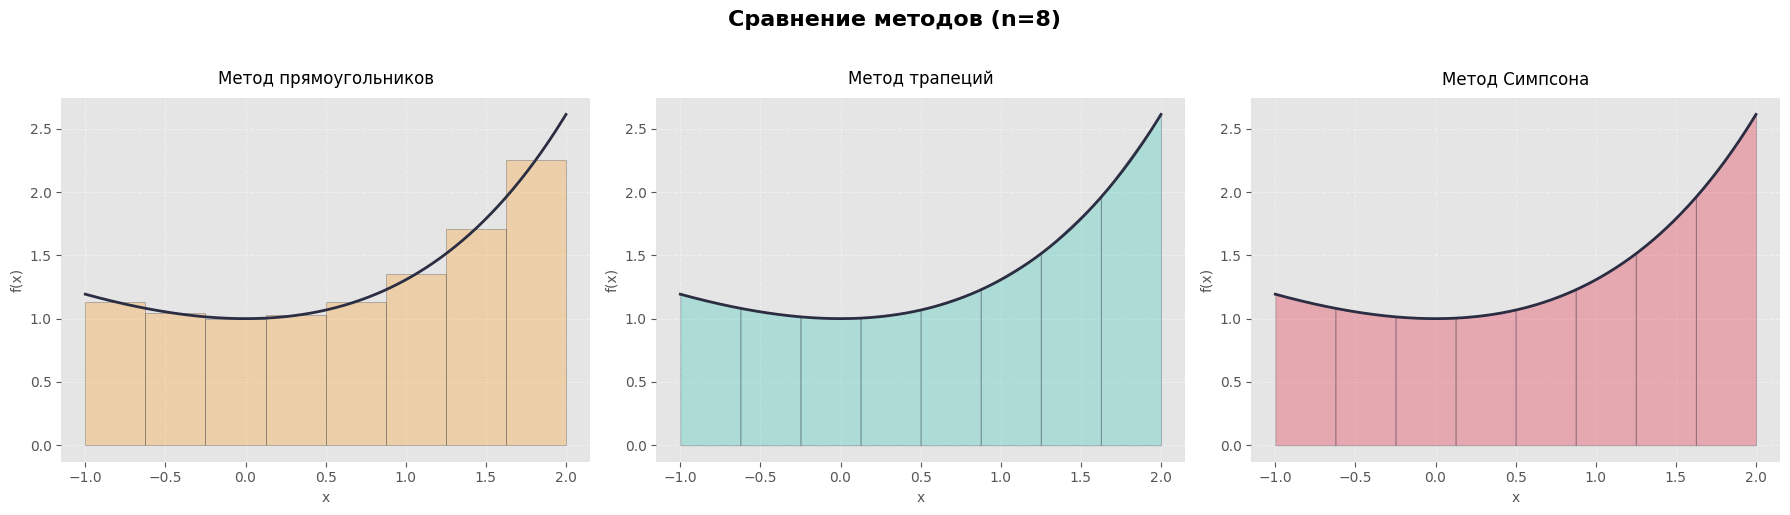

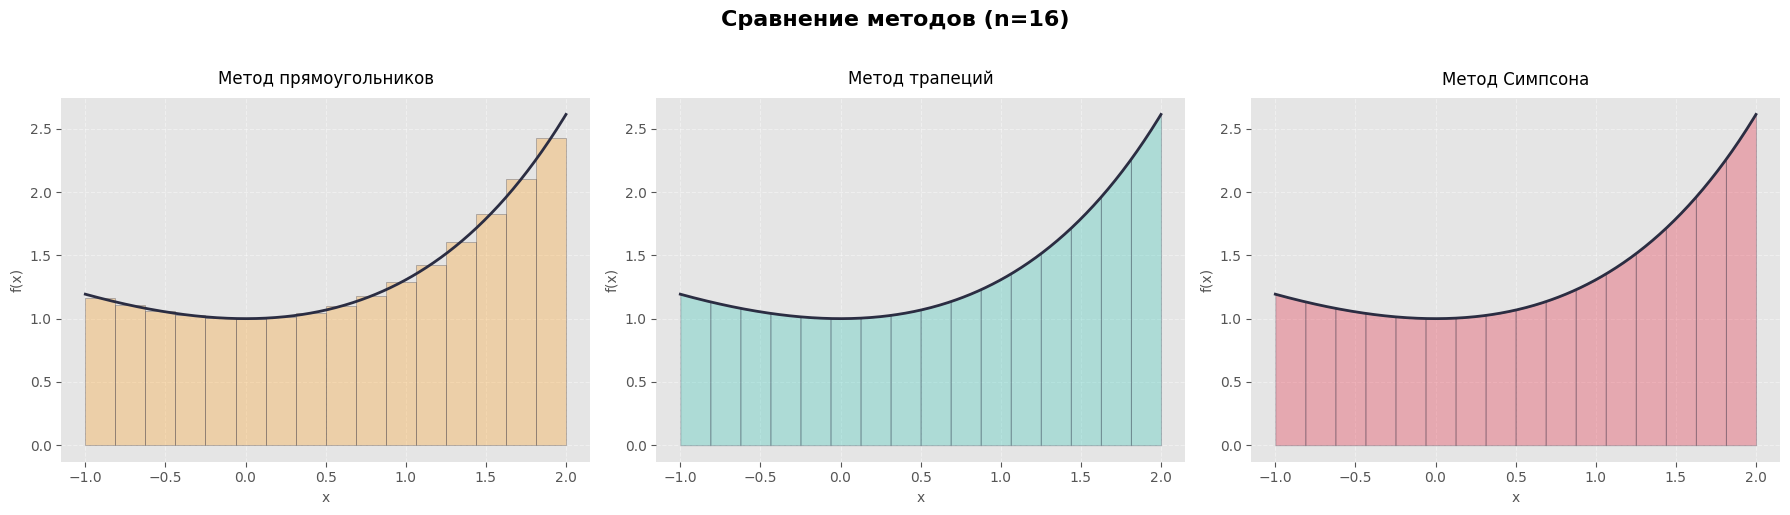

In [65]:
a, b = -1, 2
n_values = [4, 8, 16]

plot_methods_combined(f, a, b, n_values)

# 4. Проверим результаты

## 4.1 Метод прямоугольника

### 4.1.1 Метод прямоугольника (левый)

In [66]:
result_rec_left

3.988585445220278

### 4.1.2 Метод прямоугольника (правый)

In [67]:
result_rec_right

4.031202198969883

### 4.1.3 Метод прямоугольника (средний)

In [68]:
result_rec_mid

4.009620897851368

### 4.1.4 Метод прямоугольника (рандомный)

In [69]:
result_rec_rand

4.009050179921082

## 4.2 Метод трапеции

In [70]:
result_trapez

4.009893822095081

## 4.3 Метод Симпсона

In [71]:
result_simp

4.009711877516325

# 5.Проведем вычисления с разным количеством разбиений и нарисуем графики

In [72]:
from tabulate import tabulate

## 5.1 Напишем функции метрик

### 5.1.2 MSE

In [73]:
def MSE(result, analytical):
    return (result - analytical) ** 2

### 5.1.3 MAE

In [74]:
def MAE(result, analytical):
    return abs(result - analytical)

## 5.2 Выведем вычисления и ошибки

In [75]:
def print_results_table(a, b, n_values):
    analytical = integral_analytical(a, b)

    value_table = []
    for n in n_values:
        row = [n]

        for mode in ["left", "right", "mid", "random"]:
            result = rectangle_method(f, a, b, n, mode=mode)
            row.append(f"{result:.6f}")

        trapezoid_result = trapezoid_method(f, a, b, n)
        row.append(f"{trapezoid_result:.6f}")

        simpson_result = simpson_method(f, a, b, n)
        row.append(f"{simpson_result:.6f}")
        value_table.append(row)

    value_headers = [
        "n",
        "Левый (rect)", "Правый (rect)", "Середина (rect)", "Рандомный (rect)",
        "Трапеции",
        "Симпсон"
    ]
    print("\n\nТаблица значений:")
    print(tabulate(value_table, headers=value_headers, tablefmt="grid"))

    error_table = []
    for n in n_values:
        row = [n]

        for mode in ["left", "right", "mid", "random"]:
            rec_result = rectangle_method(f, a, b, n, mode=mode)
            mae = MAE(rec_result, analytical)
            mse = MSE(rec_result, analytical)
            row.append(f"{mae:.6f} | {mse:.6f}")

        trapezoid_result = trapezoid_method(f, a, b, n)
        mae = MAE(trapezoid_result, analytical)
        mse = MSE(trapezoid_result, analytical)
        row.append(f"{mae:.6f} | {mse:.6f}")

        simpson_result = simpson_method(f, a, b, n)
        mae = MAE(simpson_result, analytical)
        mse = MSE(simpson_result, analytical)
        row.append(f"{mae:.6f} | {mse:.6f}")
        error_table.append(row)

    error_headers = [
        "n",
        "Левый прямоугольник (MAE | MSE)", "Правый прямоугольник (MAE | MSE)", "Серединый прямоугольник (MAE | MSE)", "Рандомный прямоугольник (MAE | MSE)",
        "Трапеции (MAE | MSE)",
        "Симпсон (MAE | MSE)"
    ]
    print("\n\nТаблица ошибок:")
    print(tabulate(error_table, headers=error_headers, tablefmt="grid"))

In [76]:
n_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

In [77]:
print_results_table(a, b, n_values)



Таблица значений:
+-----+----------------+-----------------+-------------------+--------------------+------------+-----------+
|   n |   Левый (rect) |   Правый (rect) |   Середина (rect) |   Рандомный (rect) |   Трапеции |   Симпсон |
+=====+================+=================+===================+====================+============+===========+
|   1 |        3.57944 |         7.84112 |           3.20292 |            3.37695 |    5.71028 |   4.03871 |
+-----+----------------+-----------------+-------------------+--------------------+------------+-----------+
|   2 |        3.39118 |         5.52202 |           3.78925 |            4.23669 |    4.4566  |   4.03871 |
+-----+----------------+-----------------+-------------------+--------------------+------------+-----------+
|   4 |        3.59021 |         4.65563 |           3.9533  |            4.45968 |    4.12292 |   4.0117  |
+-----+----------------+-----------------+-------------------+--------------------+------------+-----------+

## 5.3 Нарисуем график зависимости отклонения найденного значения интеграла от истинного, с увеличением числа отрезков разбиения.

In [78]:
def plot_integration_errors(a, b, f, analytical_value, n_values):

    errors = {
        'Левый(прямоугольник)': {'MAE': [], 'MSE': []},
        'Правый(прямоугольник)': {'MAE': [], 'MSE': []},
        'Середина(прямоугольник)': {'MAE': [], 'MSE': []},
        'Случайный(прямоугольник)': {'MAE': [], 'MSE': []},
        'Метод Трапеции': {'MAE': [], 'MSE': []},
        'Метод Симпсона': {'MAE': [], 'MSE': []}
    }

    for n in n_values:

        methods = {
            'Левый(прямоугольник)': rectangle_method(f, a, b, n, mode="left"),
            'Правый(прямоугольник)': rectangle_method(f, a, b, n, mode="right"),
            'Середина(прямоугольник)': rectangle_method(f, a, b, n, mode="mid"),
            'Случайный(прямоугольник)': rectangle_method(f, a, b, n, mode="random")
        }

        trap = trapezoid_method(f, a, b, n)

        simp = simpson_method(f, a, b, n)

        for method, result in methods.items():
            errors[method]['MAE'].append(MAE(result, analytical_value))
            errors[method]['MSE'].append(MSE(result, analytical_value))

        errors['Метод Трапеции']['MAE'].append(MAE(trap, analytical_value))
        errors['Метод Трапеции']['MSE'].append(MSE(trap, analytical_value))

        errors['Метод Симпсона']['MAE'].append(MAE(simp, analytical_value))
        errors['Метод Симпсона']['MSE'].append(MSE(simp, analytical_value))

    plt.style.use("ggplot")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    colors = {
        'Левый(прямоугольник)': '#FF6B6B',
        'Правый(прямоугольник)': '#FFA500',
        'Середина(прямоугольник)': '#32CD32',
        'Случайный(прямоугольник)': '#9370DB',
        'Метод Трапеции': '#4ECDC4',
        'Метод Симпсона': '#45B7D1'
    }

    markers = {
        'Левый(прямоугольник)': 'o',
        'Правый(прямоугольник)': 's',
        'Середина(прямоугольник)': 'D',
        'Случайный(прямоугольник)': '^',
        'Метод Трапеции': 'P',
        'Метод Симпсона': 'X'
    }

    for method in errors:
        ax1.loglog(
            n_values, errors[method]['MAE'],
            label=method,
            marker=markers[method],
            color=colors[method],
            linestyle='--',
            markersize=8,
            linewidth=2,
            markerfacecolor='white',
            markeredgewidth=2
        )

        ax2.loglog(
            n_values, errors[method]['MSE'],
            label=method,
            marker=markers[method],
            color=colors[method],
            linestyle='--',
            markersize=8,
            linewidth=2,
            markerfacecolor='white',
            markeredgewidth=2
        )

    for ax in (ax1, ax2):
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('Число отрезков (n)', fontsize=12)
        ax.grid(True, which='both', ls='--', alpha=0.5)
        ax.set_xticks(n_values)
        ax.set_xticklabels(n_values, rotation=45)
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

    ax1.set_ylabel('MAE', fontsize=12)
    ax1.set_title('Зависимость MAE от числа отрезков', fontsize=14)
    ax2.set_ylabel('MSE', fontsize=12)
    ax2.set_title('Зависимость MSE от числа отрезков', fontsize=14)

    ax1.legend(fontsize=10, ncol=2, framealpha=1)
    ax2.legend(fontsize=10, ncol=2, framealpha=1)

    plt.tight_layout()
    plt.show()

In [79]:
analytical_value = integral_analytical(a, b)

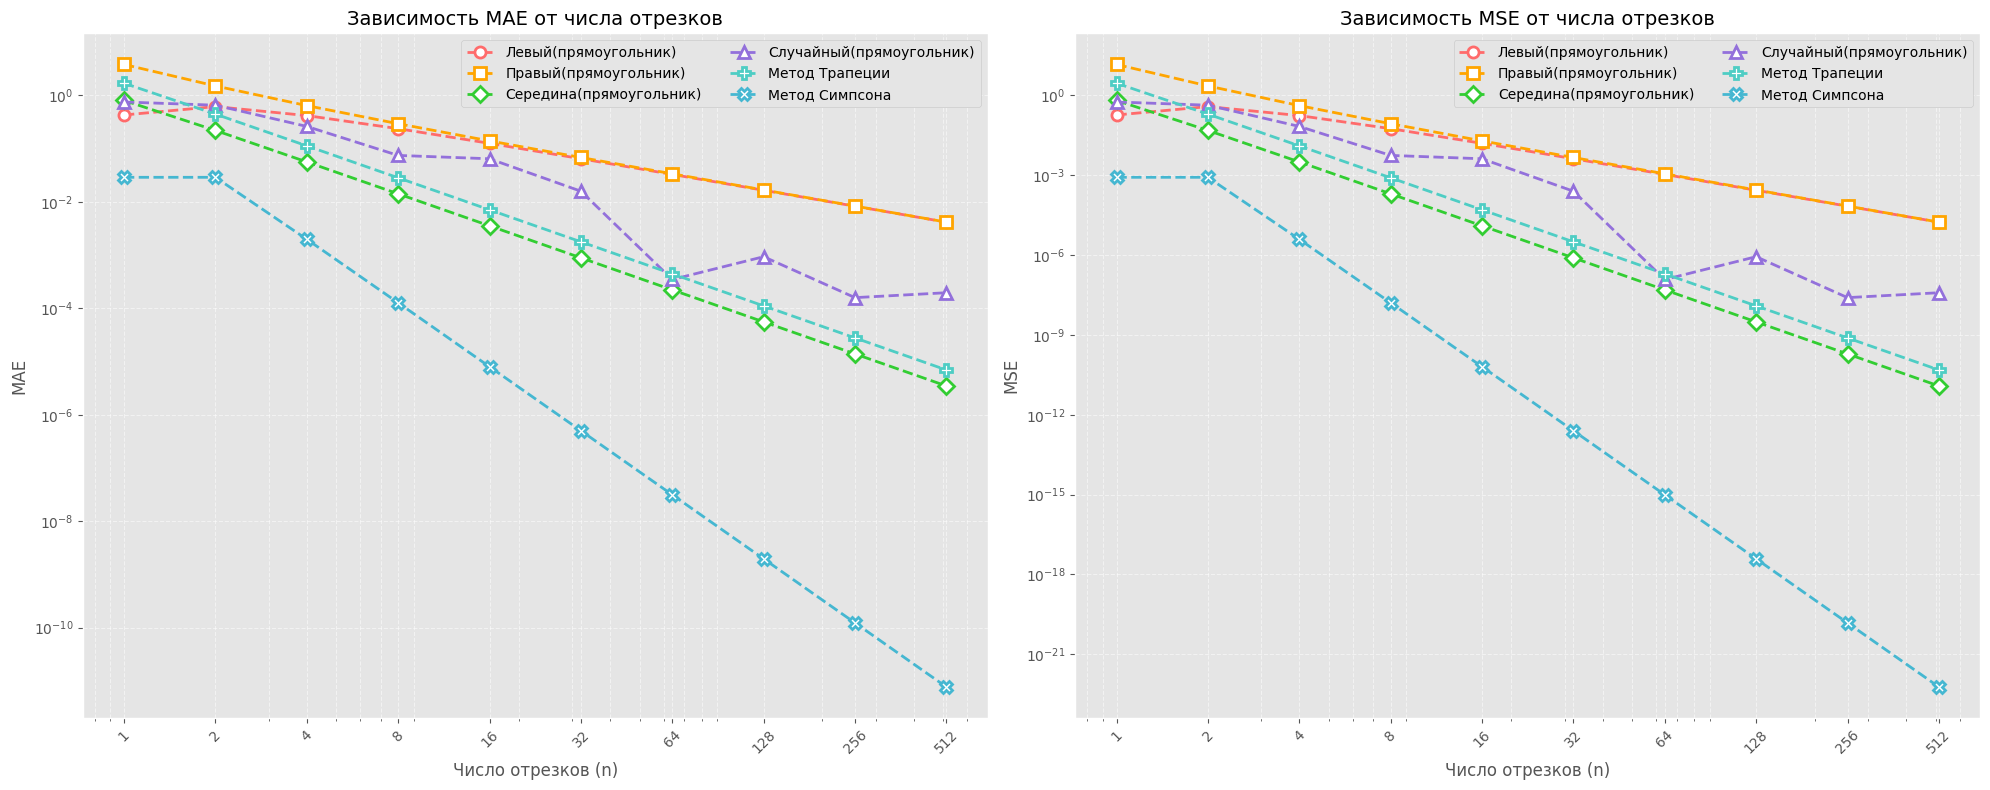

In [80]:
plot_integration_errors(a, b, f, analytical_value, n_values)